In [1]:
from birdy import WPSClient
import birdy 

fp_server = 'http://localhost:8093/wps'    # flyingpigeon
fp_i = WPSClient(fp_server, progress=True)
fp = WPSClient(fp_server)

# finch_server = 'http://localhost:8092/wps'   # finch 
# finch_i = WPSClient(url=finch_server, progress=True)
# finch = WPSClient(finch_server)

In [3]:
from os import path, listdir

path = '/home/nils/nap_niger/data/NER/'
# lists all files stored in 'path'
files = [ path+f for f in listdir(path) if 'tas_' in f]
files.sort()
# show the first files 

In [28]:
# temperature spatial plot for an example file

from netCDF4 import Dataset #  , num2date
from eggshell.nc.nc_utils import get_variable, get_time

import numpy as np 

# example file 
nc = files[0:9]

# var = get_variable(nc)
#print 'variable name: %s' % var
ds = Dataset(nc[0])
var = ds.variables['tas'] 
lats = ds.variables['lat']
lons = ds.variables['lon']

# trick to recover missing lat lon information (only possible, since AFR-22 Domain is actrually not rotated)
lon = lons[0,:]
lat = lats[:,0]

var_mean = np.mean(var[365:11315,:,:], axis=0) - 273.15 # mean over 30 Years 1981-2010 and transform to Celsius

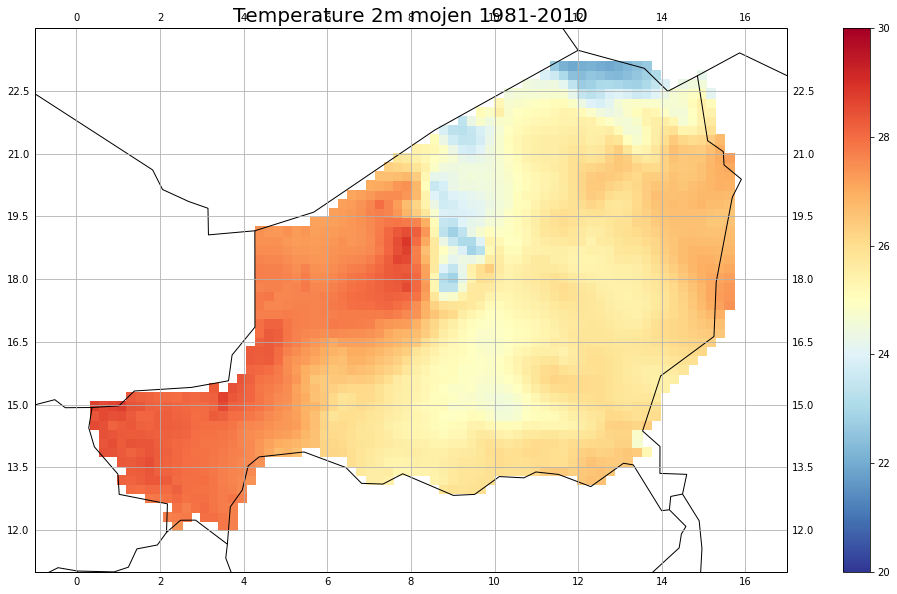

In [5]:
# prepare the plot with cartopy

from matplotlib import pyplot as plt
from cartopy import config
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from numpy import meshgrid
import cartopy.feature as cfeature

# to show the plots inline
%matplotlib inline
lons, lats = meshgrid(lon, lat)

fig = plt.figure(figsize=(20, 10), facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.PlateCarree())

extent=(-1,17,11.0,24)
ax.set_extent(extent)

ax.add_feature(cfeature.BORDERS)
# ax.add_feature(cfeature.RIVERS)
# ax.stock_img()
ax.gridlines(draw_labels=True)

# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')
# ax.colorbar

plt.title('Temperature 2m mojen 1981-2010', fontsize=20)

cs = plt.pcolormesh(lons, lats, var_mean , transform=ccrs.PlateCarree(), cmap='RdYlBu_r', vmin=20, vmax=30)
plt.colorbar(cs)
plt.savefig(fname='./pics/tas_mean_1979-2016.png')

In [ ]:
# indice calculation for production 

from os import path, listdir

path = '/home/nils/nap_niger/data/NER/'
# lists all files stored in 'path'
files = [ path+f for f in listdir(path) if 'tas_' in f]
files.sort()
# show the first files 

In [ ]:
# loop over the files and calculate the indices 

from os.path import basename 
import urllib.request

tg_yr = []
for i in files:
    url = finch.tg_mean(tas=i, freq='YS').get()[0]
    filename = basename(i).replace('_day_', '_yr_')
    out, _ = urllib.request.urlretrieve(url, '../data/tmp/tg-mean_'+filename)
    tg_yr.append(out)
print(tg_yr)

In [ ]:
### MANUAL mergetime for single files belonging to one Dataset (stored to ./data/indices)

In [13]:
# Explore the indices datasets
from os import path, listdir
path = '/home/nils/nap_niger/data/indices/'
# lists all files stored in 'path'
tg_files = [ path+f for f in listdir(path)  if 'tg-mean_' in f ]
tg_files.sort()

In [14]:
# Plot the files with the plot processes of flyingpigeon: 
plot = fp.plot_spaghetti(resource=files, variable=None)
plot.get()[0]

'http://127.0.0.1:8093/outputs/7adb4136-4119-11ea-85bd-7392e5b29c00/tmplkbphbnh.png'

In [15]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= plot.get()[0])

In [ ]:
from os import path, listdir

path = '/home/nils/nap_niger/data/bbox/'
# lists all files stored in 'path'
files = [ path+f for f in listdir(path) if 'tas_' in f]
files.sort()


from netCDF4 import Dataset #  , num2date
from eggshell.nc.nc_utils import get_variable
from numpy import meshgrid
import numpy as np 

# example file 
nc = files[5]

var = get_variable(nc)
#print 'variable name: %s' % var
ds = Dataset(nc)
var = ds.variables[var] 
lat = ds.variables['rlat']
lon = ds.variables['rlon']

lons, lats = meshgrid(lon, lat)

var_mean = np.mean(var[365:11315,:,:], axis=0) - 273.15 # mean over 30 Years 1981-2010 and transform to Celsius

# prepare the plot with cartopy

from matplotlib import pyplot as plt
from cartopy import config
from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from numpy import meshgrid
import cartopy.feature as cfeature

# to show the plots inline
%matplotlib inline

fig = plt.figure(figsize=(20, 10), facecolor='w', edgecolor='k')
ax = plt.axes(projection=ccrs.PlateCarree())

extent=(-3,20,7,27)
ax.set_extent(extent)

ax.add_feature(cfeature.BORDERS)
# ax.add_feature(cfeature.RIVERS)
# ax.stock_img()
ax.gridlines(draw_labels=True)

# ax.xaxis.set_ticks_position('bottom')
# ax.yaxis.set_ticks_position('left')
# ax.colorbar

plt.title('Temperature 2m mojen 1981-2010', fontsize=20)

cs = plt.pcolormesh(lons, lats, var_mean , transform=ccrs.PlateCarree(), cmap='RdYlBu_r', vmin=20, vmax=30)
plt.colorbar(cs)
plt.savefig(fname='./pics/prcptot_mean_1979-2016_bbox.png')

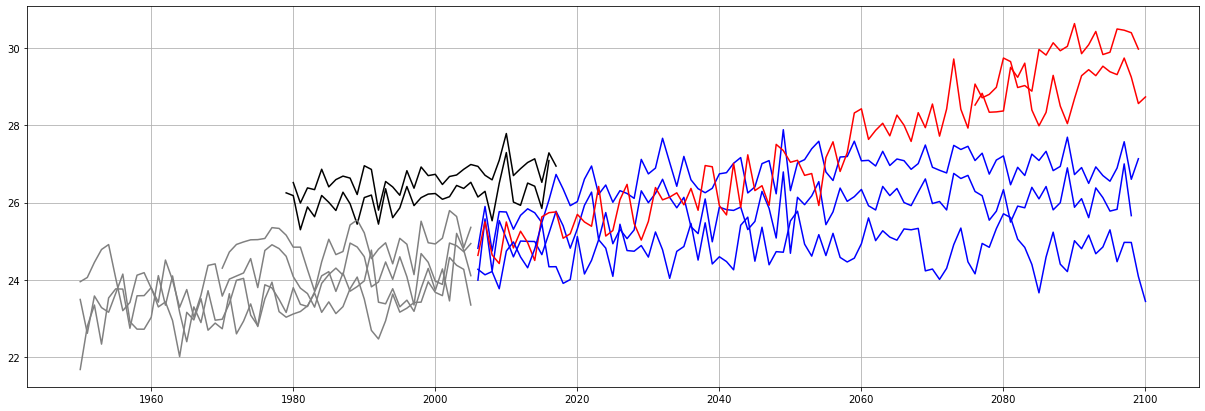

In [34]:
fig = plt.figure(figsize=(21, 7), facecolor='w', edgecolor='k')
   
for i in tg_files:
    ds = Dataset(i)
    var = get_variable(i)
    tg_val = ds.variables[var] 
    yrs = get_time(i)
    if 'historical' in i:
        col = 'grey'
    elif 'evaluation' in i:
        col = 'black'
    elif 'rcp26' in i:
        col = 'blue'
    elif 'rcp85' in i:
        col = 'red'
    else:
        col = 'green'
    
    d2 = np.nanmean(tg_val, axis=1)
    ts = np.nanmean(d2, axis=1) - 273.15
    plt.plot(yrs,ts, col )

plt.grid()    
plt.savefig(fname='./pics/tas_timeserie.png')    
plt.show() 